# Load Store Handler Class

In [15]:
from RES.hdf5_handler import DataHandler
import RES.visuals as vis

In [16]:
country_code:str='AL' # This branch of RES is designed to work for WB6 countries
scenario=1.2
legend_x_ax_offset=1.2
legend_y_ax_offset=0.82

# Define Province Code

In [17]:
store=f"../data/store/resources_{country_code}.h5"# f"../data/store/resources_{province_code}.h5" 
res_data=DataHandler(store) # the DataHandler object could be initiated without the store definition as well.

# What's inside the Store ?

In [18]:
res_data.show_tree(store) # Shows the hierarchical data inside the store

____________________________________________________________
     Structure of HDF5 file: ../data/store/resources_AL.h5
____________________________________________________________
[key] boundary
[key] cells
[key] clusters
  └─ [key] clusters/solar
  └─ [key] clusters/wind
[key] cost
  └─ [key] cost/atb
  └─   └─ [key] cost/atb/solar
  └─   └─ [key] cost/atb/wind
[key] dissolved_indices
  └─ [key] dissolved_indices/solar
  └─ [key] dissolved_indices/wind
[key] lines
[key] timeseries
  └─ [key] timeseries/clusters
  └─   └─ [key] timeseries/clusters/solar
  └─   └─ [key] timeseries/clusters/wind
  └─ [key] timeseries/solar
  └─ [key] timeseries/wind
[key] units


└> To access the data : 
 └> <datahandler instance>.from_store('<key>')


# Load Data from Store

#### ATB

In [19]:
# import pandas as pd
# atb=pd.read_parquet('../data/downloaded_data/NREL/ATB/ATBe.parquet')
# atb.core_metric_parameter.unique()

### Clusters

In [20]:
# Loading Grid Cells Geodataframe
cells=res_data.from_store('cells')
boundary=res_data.from_store('boundary')
solar_clusters=res_data.from_store('clusters/solar')
wind_clusters=res_data.from_store('clusters/wind')
units=res_data.from_store('units')

└> Combined CF vs LCOE plot created and saved to: vis/Resources_CF_vs_LCOE_combined.png


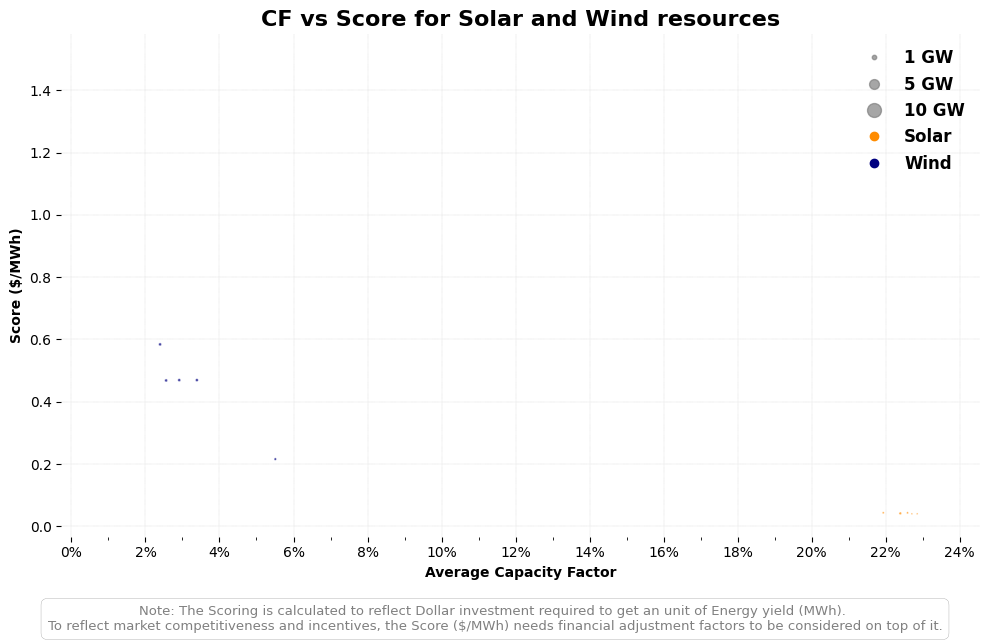

In [21]:
# vis.plot_resources_scatter_metric('wind', wind_clusters, 200)
# vis.plot_resources_scatter_metric('solar', solar_clusters, 100)

# Usage:
vis.plot_resources_scatter_metric_combined(solar_clusters, wind_clusters,120)

In [22]:
vis.get_selected_vs_missed_visuals(cells,'AL','solar',20,0.2,100)

In [23]:
# vis.get_selected_vs_missed_visuals(cells,'BC','wind',10,0.15,100)

In [24]:
# cells[cells['potential_capacity_solar']==0].explore()

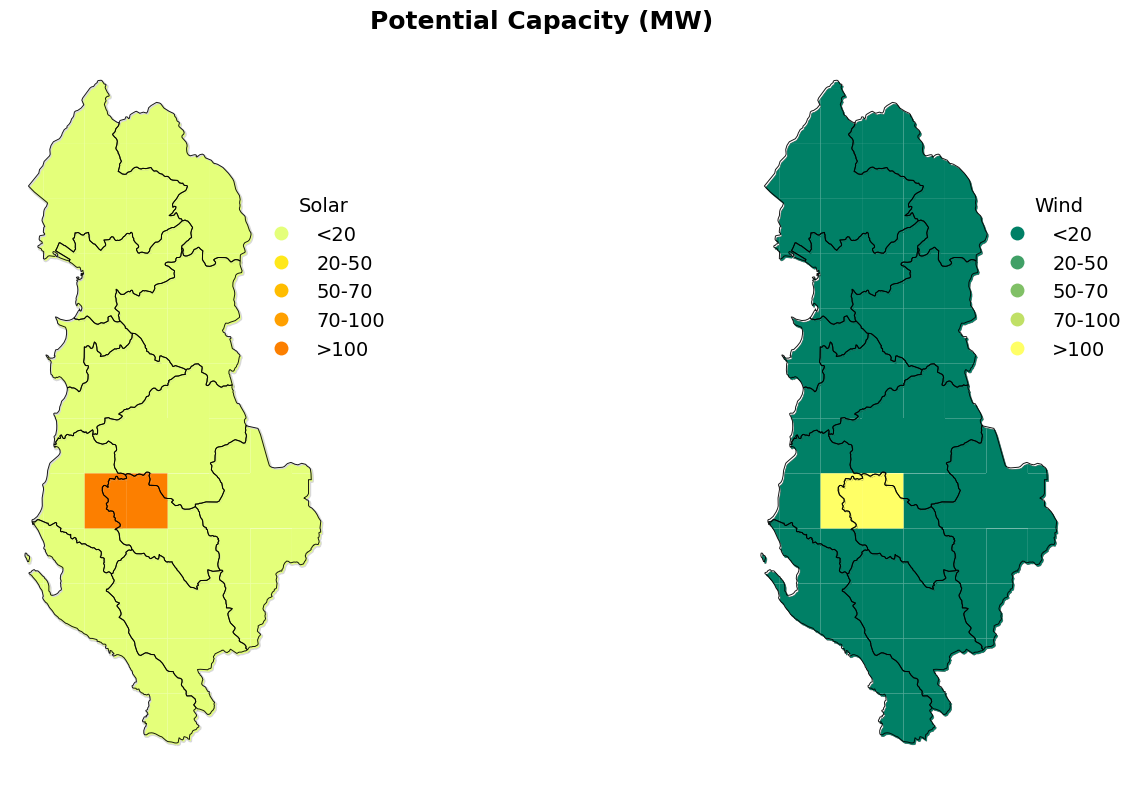

In [25]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
bins = [0, 20, 50, 70, 100, float('inf')]  # Custom ranges
labels = ['<20','20-50', '50-70', '70-100', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['potential_capacity_solar'], bins=bins, labels=labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['potential_capacity_wind'], bins=bins, labels=labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Potential Capacity (MW)", fontsize=18, fontweight='bold')
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
solar_plot = cells.plot(
    column='solar_category', ax=ax1, cmap='Wistia', legend=True,
    legend_kwds={
        'title': "Solar", 
        'loc': 'upper right',
        'bbox_to_anchor': (legend_x_ax_offset, legend_y_ax_offset),
        'fontsize': 14,
        'frameon': False,
        'title_fontsize': 14
    }
)

boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

# Plot wind map on ax2
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

wind_plot = cells.plot(
    column='wind_category', ax=ax2, cmap='summer', legend=True,
    legend_kwds={
        'title': "Wind",
        'bbox_to_anchor': (legend_x_ax_offset, legend_y_ax_offset),
        'fontsize': 14,
        'frameon': False,
        'title_fontsize': 14
    }
)

boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

fig.patch.set_alpha(0)
plt.tight_layout()
plt.show()


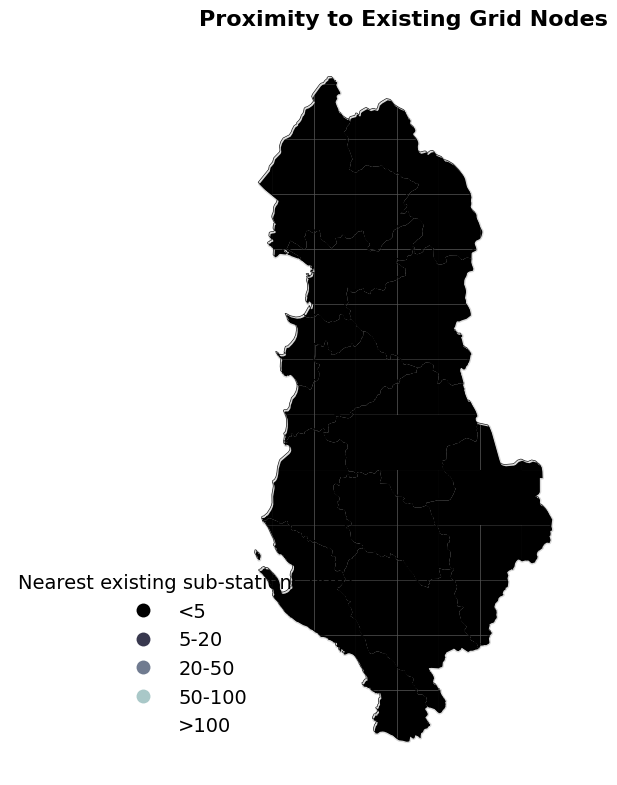

In [26]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)


# Define custom bins and labels for solar and wind capacity
bins = [0, 5, 20, 50, 100, float('inf')]  # Custom ranges
labels = ['<5','5-20', '20-50', '50-100', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['station_distance_category'] = pd.cut(cells['nearest_distance'], bins=bins, labels=labels, include_lowest=True)


# Create figure and axes for side-by-side plotting
fig, (ax) = plt.subplots(figsize=(18, 8))
fig.suptitle("Proximity to Existing Grid Nodes", fontsize=16, fontweight='bold')
ax.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(
    column='station_distance_category',
    ax=ax,
    cmap='bone',
    legend=True,
    legend_kwds={
        'title': "Nearest existing sub-stations (km)",
        'title_fontsize': 14,
        'loc': 'upper right',
        'bbox_to_anchor': (0.4, 0.3),
        'fontsize':14,
        'frameon': False
    }
)

# Plot actual boundary for solar map
boundary.plot(ax=ax, facecolor='None', edgecolor='black', linewidth=0.5, alpha=0.9)

# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
plt.tight_layout()

# Show the side-by-side plot
plt.show()

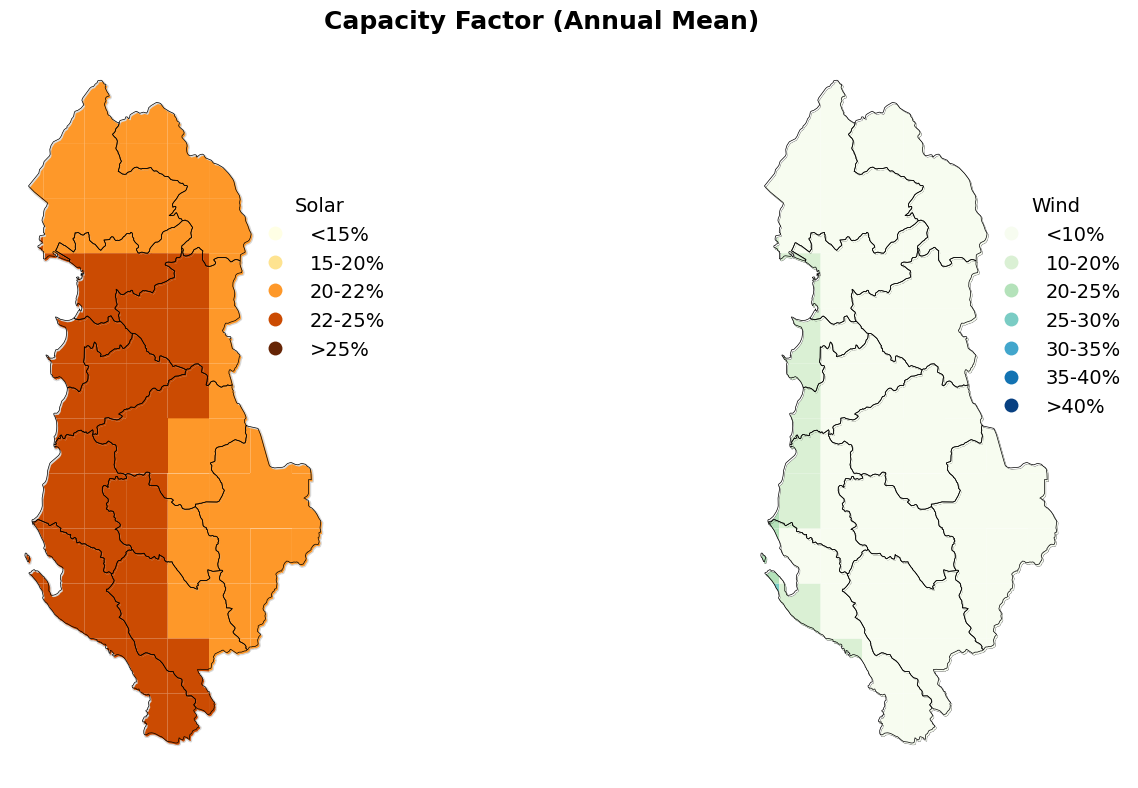

In [27]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
solar_bins = [0, 0.15, 0.20, 0.22, 0.25, float('inf')]  # Custom ranges
solar_labels = ['<15%', '15-20%', '20-22%', '22-25%', '>25%']  # Labels for legend

# Define custom bins and labels for solar and wind capacity
wind_bins = [0, .10, .20, .25,.30, .35, .40, float('inf')]  # Custom ranges
wind_labels = ['<10%','10-20%', '20-25%','25-30%','30-35%','35-40%','>40%']  # Labels for legend

# Drop rows where solar_CF_mean or wind_CF_mean is zero
cells = cells[(cells['solar_CF_mean'] > 0) & (cells['wind_CF_mean'] > 0)]

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['solar_CF_mean'], bins=solar_bins, labels=solar_labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['wind_CF_mean'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Capacity Factor (Annual Mean)", fontsize=18, fontweight='bold')
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='solar_category', ax=ax1, cmap='YlOrBr', legend=True, 
        legend_kwds={'title': "Solar", 'title_fontsize': 14, 'bbox_to_anchor': (legend_x_ax_offset, legend_y_ax_offset), 'fontsize': 14, 'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
cells.plot(column='wind_category', ax=ax2, cmap='GnBu', legend=True, 
           legend_kwds={'title': "Wind", 'title_fontsize':14, 'bbox_to_anchor':(legend_x_ax_offset,legend_y_ax_offset),'fontsize':14,'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent

plt.tight_layout()

# Show the side-by-side plot

# plt.savefig('solar_wind_CF_map.png',dpi=300)
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

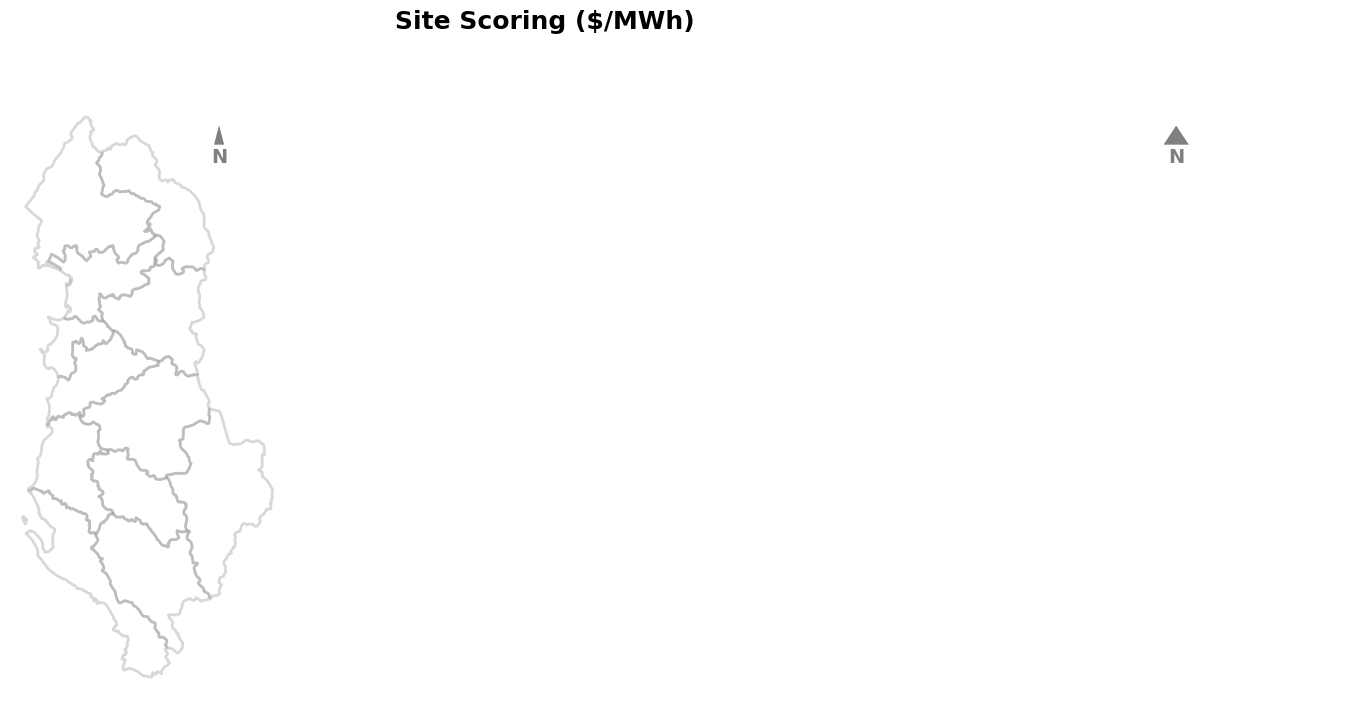

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
solar_bins = [20, 30, 50, 70, 80, float('inf')]  # Custom ranges
solar_labels = ['<20','20-30', '30-55','50-70','>80']  # Labels for legend

# Define custom bins and labels for solar and wind capacity
wind_bins = [20, 30, 40, 50, 60, 80, 100, float('inf')]  # Custom ranges
wind_labels = ['<20','20-30', '30-40','40-50','50-60', '60-80', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['lcoe_solar'], bins=solar_bins, labels=solar_labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['lcoe_wind'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(20, 8), ncols=2)
fig.suptitle("Site Scoring ($/MWh)", fontsize=18, fontweight='bold')
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()
vis.add_compass_to_plot(ax1)
vis.add_compass_to_plot(ax2)
# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='solar_category', ax=ax1, cmap='Wistia', legend=False, 
           legend_kwds={'title': "Solar",'title_fontsize':14, 'bbox_to_anchor':(legend_x_ax_offset,legend_y_ax_offset),'fontsize':14,'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
cells.plot(column='wind_category', ax=ax2, cmap='winter', legend=False, 
           legend_kwds={'title': "Wind", 'title_fontsize':14, 'bbox_to_anchor':(legend_x_ax_offset,legend_y_ax_offset),'fontsize':14,'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
# Add annotation to the figure
fig.text(0.5, 0.01, 
         "Note: The Scoring is calculated to reflect Dollar investment required to get an unit of Energy yield (MWh). "
         "\nTo reflect market competitiveness and incentives, the Score ($/MWh) needs financial adjustment factors to be considered on top of it.",
         ha='center', va='center', fontsize=10, color='gray', bbox=dict(facecolor='None', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.tight_layout()

# Show the side-by-side plot

plt.savefig('solar_wind_score_map.png',dpi=300)
plt.show()



/tmp/ipykernel_2977570/3865491242.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  solar_cmap = cm.get_cmap('Wistia', len(solar_labels))
/tmp/ipykernel_2977570/3865491242.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  wind_cmap = cm.get_cmap('winter', len(wind_labels))
/tmp/ipykernel_2977570/3865491242.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  solar_capacity = cells.groupby('solar_category')['potential_capacity_solar'].sum().div(

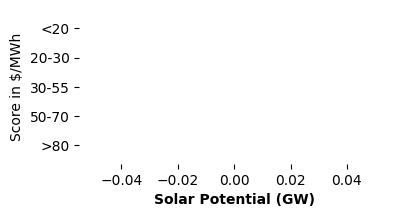

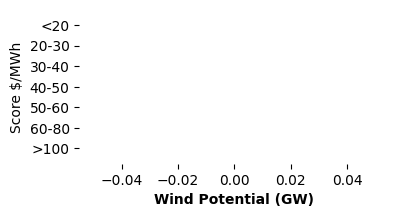

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define colormaps
solar_cmap = cm.get_cmap('Wistia', len(solar_labels))
wind_cmap = cm.get_cmap('winter', len(wind_labels))

# Generate colors for each bin
solar_colors = [mcolors.rgb2hex(solar_cmap(i)) for i in range(len(solar_labels))]
wind_colors = [mcolors.rgb2hex(wind_cmap(i)) for i in range(len(wind_labels))]

# Aggregate potential capacity for each bin
solar_capacity = cells.groupby('solar_category')['potential_capacity_solar'].sum().div(1e3).reindex(solar_labels, fill_value=0)
wind_capacity = cells.groupby('wind_category')['potential_capacity_wind'].sum().div(1e3).reindex(wind_labels, fill_value=0)

### Solar Plot ###
fig1, ax1 = plt.subplots(figsize=(4, 2))
fig1.patch.set_alpha(0)  # Make figure background transparent
ax1.set_facecolor('none')  # Make axis background transparent

ax1.barh(solar_capacity.index, solar_capacity.values, color=solar_colors, edgecolor='none')
# ax1.set_title('Solar Simplified Levelized Cost of Energy', fontsize=9)
ax1.set_xlabel('Solar Potential (GW)', fontsize=10, weight='bold')
ax1.set_ylabel('Score in $/MWh')
ax1.invert_yaxis()  # Highest bin appears at the top

# Remove spines for a clean look
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(left=True, bottom=True)  # Remove y-axis ticks

plt.show()

### Wind Plot ###
fig2, ax2 = plt.subplots(figsize=(4, 2))
fig2.patch.set_alpha(0)  # Make figure background transparent
ax2.set_facecolor('none')  # Make axis background transparent

ax2.barh(wind_capacity.index, wind_capacity.values, color=wind_colors, edgecolor='none')
# ax2.set_title('Wind Simplified Levelized Cost of Energy', fontsize=9)
ax2.set_xlabel('Wind Potential (GW)', fontsize=10, weight='bold')
ax2.set_ylabel('Score $/MWh')
ax2.invert_yaxis()  # Highest bin appears at the top

# Remove spines for a clean look
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.tick_params(left=True, bottom=True)  # Remove y-axis ticks

plt.show()

In [30]:
cells_aggrs_region=cells.groupby('Region').aggregate({'potential_capacity_solar':'sum','potential_capacity_wind':'sum','nearest_station_distance_km':'mean','solar_CF_mean':'mean','wind_CF_mean':'mean','lcoe_solar':'mean','lcoe_wind':'mean'})

KeyError: "Column(s) ['nearest_station_distance_km'] do not exist"

In [ ]:
# Map Population and GDP to gdf using Region
boundary["potential_capacity_solar"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["potential_capacity_solar"])
boundary["potential_capacity_wind"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["potential_capacity_wind"])
boundary["solar_CF_mean"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["solar_CF_mean"])
boundary["wind_CF_mean"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["wind_CF_mean"])
# Map Population and GDP to gdf using Region
boundary["potential_capacity_solar"] = boundary["potential_capacity_solar"].apply(lambda x: x / 1E3)
boundary["potential_capacity_wind"] = boundary["potential_capacity_wind"].apply(lambda x: x / 1E3)

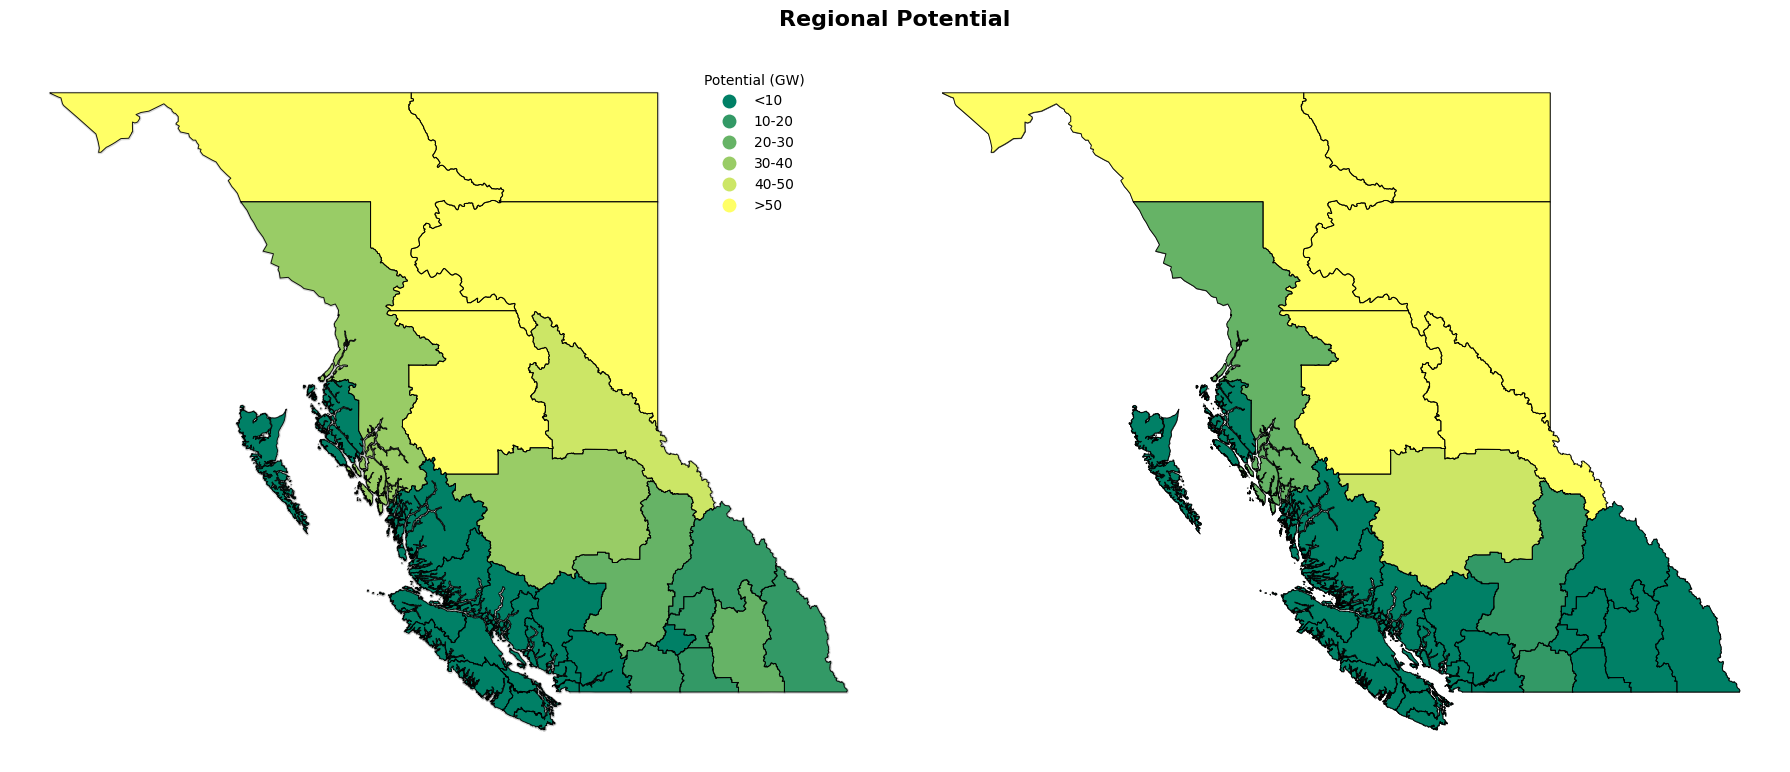

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
bins = [0, 10, 20, 30, 40, 50, float('inf')]  # Custom ranges
labels = ['<10','10-20', '20-30','30-40','40-50','>50']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
boundary['solar_category'] = pd.cut(boundary['potential_capacity_solar'], bins=bins, labels=labels, include_lowest=True)
boundary['wind_category'] = pd.cut(boundary['potential_capacity_wind'], bins=bins, labels=labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Regional Potential", fontsize=16,weight='bold')
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
boundary.plot(column='solar_category', ax=ax1, cmap='summer', legend=True, 
           legend_kwds={'title': "Potential (GW)", 'loc': 'upper right','bbox_to_anchor':(legend_x_ax_offset,1),  'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
boundary.plot(column='wind_category', ax=ax2, cmap='summer', legend=False, 
           legend_kwds={'title': "Wind (GW))", 'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
plt.tight_layout()
fig.patch.set_alpha(0)  # Make figure background transparent
# Show the side-by-side plot

# plt.savefig('solar_wind_regional_aggr_cap_map.png',dpi=300)
plt.show()